In [2]:
import quandl
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
quandl.ApiConfig.api_key = "K42xtcTyEM7To-P_MwmN"
import matplotlib.pyplot as plt

In [3]:
# Import the Data and get an overview of what is looks like.
# To analyze a different stock, enter the ticker symbol 
df = quandl.get("WIKI/TSLA")
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


In [4]:
# We will be focusing on the Adj. Closing Price, which is the price the stock's closing price AFTER accounting for
# for any corporate actions.
# Below, we store it into a dataframe.

df = df[['Adj. Close']]
df.head()

,Adj. Close
Date,
2010-06-29,23.89
2010-06-30,23.83
2010-07-01,21.96
2010-07-02,19.20
2010-07-06,16.11


In [5]:
# We use the variable below to store how long we want to predict, or forecast, the stock's behavior.
forecast_out = 30 # where 30 equals 30 days into the future
com = df[-30:] # store the last 30 days of data, we'll use this to compare it to our prediction
compare = com.to_numpy()

#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)

df.head()

### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows, as will be predicting them and don't want to train on those values.
X = X[:-forecast_out]


### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])

# Get all of the y values except the last 'n' rows.
y = y[:-forecast_out]
print(y)

[ 17.9   17.6   18.32 ... 301.54 304.18 279.18]


In [6]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the Linear Regression  Model
lr = LinearRegression()

# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0

lr_test = lr.score(x_test, y_test)
print("The accuracy score for the model is: ", lr_test)

The accuracy score for the model is:  0.945120535898416


In [12]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]

# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[324.59112364 323.27155747 334.7615577  336.1544331  335.45066448
 334.01380354 346.59366769 352.34111145 357.59005243 351.30500764
 343.55377822 331.69723182 335.79277423 334.06267636 329.02877579
 333.03634712 329.90848657 328.02199568 345.94854645 342.36128138
 327.49416921 326.48738909 322.3331993  314.71881378 311.77666995
 317.62185935 310.35935813 302.96978759 305.55027254 281.113862  ]


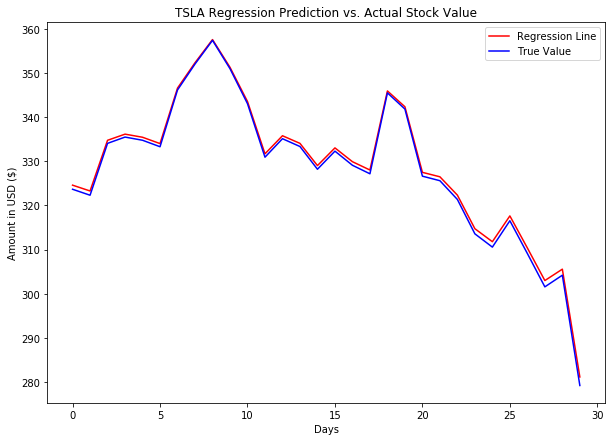

In [13]:
# Plotting prediction vs actual price over 30 day period
plt.figure(figsize=(10,7))
plt.plot(lr_prediction, c="red", label="Regression Line")
plt.plot(x_forecast, c="blue", label="True Value")
plt.title("TSLA Regression Prediction vs. Actual Stock Value")
plt.xlabel("Days")
plt.ylabel("Amount in USD ($)")
plt.legend()

After running this model for a number of stocks: TSLA, MSFT, NVDA, NFLX, etc, we tend to see that the model has a tendency to overfit. We observe this as the regression analysis is producing misleading R-squared values. <br>
<br>
Overfit regression models have too many terms for the number of observations. By running this model multiple times for different stocks, we tend to see the model represent the noise rather than the genuine relationships within the stocks behavior.